<a href="https://colab.research.google.com/github/bdfd/Portfolio_Project_16OP-Google_Stock_Price_Prediction/blob/main/Google_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock Price Prediction

## Exploratory Data Analysis

The Background Introduction  
Predict the trend for the price of google stock 

The Approach  
1. Perform some quick EDA(Exploratory Data Analysis)
2. Feature Engineering
3. Data Cleaning 
5. Traning Machine Learning Models
5. Cross Validation and Ensembling Predictions

Prediction Used Model:
  *   1. Linear Regression 

Target Cluster Datasets is about a set of data regarding about profit based on  following fields.  

Analyze information  


In [1]:
!pip install table_nan_val
!pip install execdata
!pip install catboost
!pip install quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import table_nan_val as tnv
import execdata as exe
from catboost import CatBoostClassifier
import quandl

In [4]:
# Configuration Setting
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

In [25]:
# Import necessary packages
import os 
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
sns.set(style='darkgrid', font_scale=1.4)

#Scikit-Learn Fundamental Packages
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, plot_confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve, plot_roc_curve
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
# df = quandl.get('WIKI/GOOGL')
# df.head()
# df.to_csv('Google Stock Price.csv')

# Read the dataset - switch to second link if first one not work, OP mean On Progressing
data_dir = 'https://raw.githubusercontent.com/bdfd/Portfolio_Project_16OP-Google_Stock_Price_Prediction/main/dataset'
dataset_url_1 = 'Google%20Stock%20Price.csv'
dataset_url_2 = 'Google%20Stock%20Price.csv'
# Upload dataset into data frame
df = pd.read_csv(os.path.join(data_dir,dataset_url_1), encoding = 'utf-8')
df2 = pd.read_csv(os.path.join(data_dir,dataset_url_2), encoding = 'utf-8')
df.head(3)

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
1,2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2,2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0


In [6]:
print(f'the dataset_1 size is {df.shape} and dataset_2 size is {df2.shape}')

the dataset_1 size is (3424, 13) and dataset_2 size is (3424, 13)


In [7]:
# Check column name and categories
df.columns.values

array(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend',
       'Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close',
       'Adj. Volume'], dtype=object)

In [8]:
df.nunique()

Date           3424
Open           3265
High           3259
Low            3304
Close          3327
Volume         3396
Ex-Dividend       2
Split Ratio       1
Adj. Open      3308
Adj. High      3296
Adj. Low       3335
Adj. Close     3355
Adj. Volume    3396
dtype: int64

In [9]:
# Find any missing or null value
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         3424 non-null   object 
 1   Open         3424 non-null   float64
 2   High         3424 non-null   float64
 3   Low          3424 non-null   float64
 4   Close        3424 non-null   float64
 5   Volume       3424 non-null   float64
 6   Ex-Dividend  3424 non-null   float64
 7   Split Ratio  3424 non-null   float64
 8   Adj. Open    3424 non-null   float64
 9   Adj. High    3424 non-null   float64
 10  Adj. Low     3424 non-null   float64
 11  Adj. Close   3424 non-null   float64
 12  Adj. Volume  3424 non-null   float64
dtypes: float64(12), object(1)
memory usage: 347.9+ KB


Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

In [10]:
# Varify the data type match with corresponding columns types
df.dtypes

Date            object
Open           float64
High           float64
Low            float64
Close          float64
Volume         float64
Ex-Dividend    float64
Split Ratio    float64
Adj. Open      float64
Adj. High      float64
Adj. Low       float64
Adj. Close     float64
Adj. Volume    float64
dtype: object

In [11]:
df.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03,3424.000000,3424.0,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03
mean,596.602610,602.045438,590.571710,596.352862,7.818568e+06,0.165880,1.0,409.221461,412.786556,405.227809,409.057885,7.818568e+06
std,226.989782,227.783310,225.846581,226.896692,8.248211e+06,9.706436,0.0,257.844081,259.366718,255.981628,257.773495,8.248211e+06
min,99.090000,101.740000,95.960000,100.010000,5.211410e+05,0.000000,1.0,49.698414,51.027517,48.128568,50.159839,5.211410e+05
25%,461.157500,465.392500,456.065000,461.205000,2.430647e+06,0.000000,1.0,231.292728,233.416785,228.738594,231.316552,2.430647e+06
50%,565.120000,569.599950,559.860000,564.940000,5.076200e+06,0.000000,1.0,300.174109,302.496277,297.909618,300.264387,5.076200e+06
75%,735.627500,740.850000,728.680025,733.262500,1.020910e+07,0.000000,1.0,561.178118,565.000000,556.673036,561.200000,1.020910e+07
max,1226.800000,1228.880000,1218.600000,1220.170000,8.215110e+07,567.971668,1.0,1188.000000,1198.000000,1184.060000,1187.560000,8.215110e+07


Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


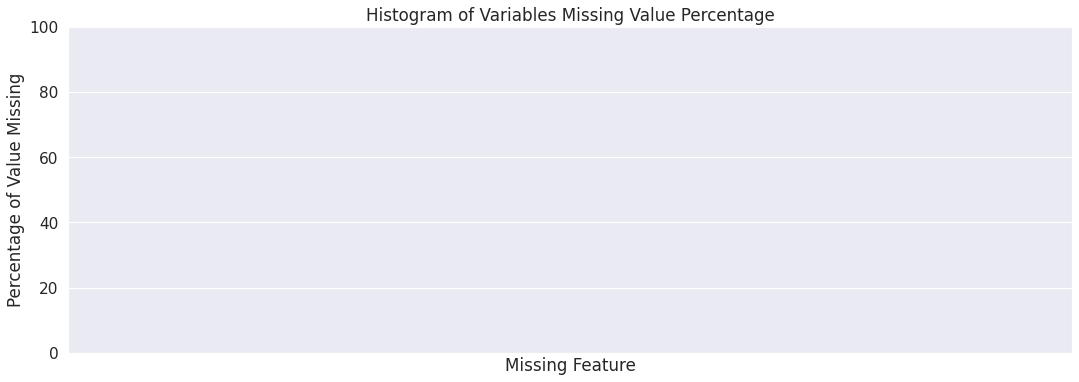

,index,Miss_Values,Miss_Rate,Available_Value


In [12]:
tnv.Missing_Value_Analysis(df)

In [13]:
print(f'Duplicates in this dataset frame: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('')

Duplicates in this dataset frame: 0, (0.0%)



## Data Cleansing and Feature Engineering

In [18]:
df = df[['Adj. Open',	'Adj. High',	'Adj. Low',	'Adj. Close',	'Adj. Volume']]
df.head(3)

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,50.159839,52.191109,48.128568,50.322842,44659000.0
1,50.661387,54.708881,50.405597,54.322689,22834300.0
2,55.551482,56.915693,54.693835,54.869377,18256100.0


In [20]:
#Create new calculation column - High Minus Low Percentage 
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT
0,50.159839,52.191109,48.128568,50.322842,44659000.0,3.712563
1,50.661387,54.708881,50.405597,54.322689,22834300.0,0.710922
2,55.551482,56.915693,54.693835,54.869377,18256100.0,3.729433
3,55.792225,55.972783,51.945350,52.597363,15247300.0,6.417469
4,52.542193,54.167209,52.100830,53.164113,9188600.0,1.886792
...,...,...,...,...,...,...
3419,1092.570000,1108.700000,1087.210000,1094.000000,1990515.0,1.343693
3420,1080.010000,1083.920000,1049.640000,1053.150000,3418154.0,2.921711
3421,1051.370000,1066.780000,1024.870000,1026.550000,2413517.0,3.918952
3422,1050.600000,1059.270000,1010.580000,1054.090000,3272409.0,0.491419


In [22]:
#Create new calculation column - Daily Move Change
df['PCT_change'] = (df['Adj. Close'] -df['Adj. Open']) / df['Adj. Open'] * 100.0
df

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
0,50.159839,52.191109,48.128568,50.322842,44659000.0,3.712563,0.324968
1,50.661387,54.708881,50.405597,54.322689,22834300.0,0.710922,7.227007
2,55.551482,56.915693,54.693835,54.869377,18256100.0,3.729433,-1.227880
3,55.792225,55.972783,51.945350,52.597363,15247300.0,6.417469,-5.726357
4,52.542193,54.167209,52.100830,53.164113,9188600.0,1.886792,1.183658
...,...,...,...,...,...,...,...
3419,1092.570000,1108.700000,1087.210000,1094.000000,1990515.0,1.343693,0.130884
3420,1080.010000,1083.920000,1049.640000,1053.150000,3418154.0,2.921711,-2.487014
3421,1051.370000,1066.780000,1024.870000,1026.550000,2413517.0,3.918952,-2.360729
3422,1050.600000,1059.270000,1010.580000,1054.090000,3272409.0,0.491419,0.332191


In [24]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
0,50.322842,3.712563,0.324968,44659000.0
1,54.322689,0.710922,7.227007,22834300.0
2,54.869377,3.729433,-1.227880,18256100.0
3,52.597363,6.417469,-5.726357,15247300.0
4,53.164113,1.886792,1.183658,9188600.0


In [26]:
forecase_col = 'Adj. Close'

In [29]:
forecast_out = int(math.ceil(0.1*len(df)))
forecast_out

343

In [32]:
df['label'] = df[forecase_col].shift(-forecast_out)
df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
0,50.322842,3.712563,0.324968,44659000.0,214.005615
1,54.322689,0.710922,7.227007,22834300.0,210.725489
2,54.869377,3.729433,-1.227880,18256100.0,208.072299
3,52.597363,6.417469,-5.726357,15247300.0,218.288837
4,53.164113,1.886792,1.183658,9188600.0,223.309335
...,...,...,...,...,...
3419,1094.000000,1.343693,0.130884,1990515.0,NaN
3420,1053.150000,2.921711,-2.487014,3418154.0,NaN
3421,1026.550000,3.918952,-2.360729,2413517.0,NaN
3422,1054.090000,0.491419,0.332191,3272409.0,NaN


## Model Development and Model Evaluation

In [16]:
# X = df.iloc[:,1:-1] # X value contains all the variables except labels -only if the prediction column is last one
# y = df.iloc[:,-1] # these are the labels
df_train, df_test = exe.split(df)
# rewrite the target variable
target_variable = 'Purchased'
X_train, y_train, X_test, y_test = exe.sep(df_train, df_test, target_variable)
# we create the test train split first


KeyError: ignored

In [ ]:
# from sklearn.preprocessing import LabelEncoder
categorical_feature = ['Gender']
gender_ohe = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  gender_ohe,
                                  categorical_feature)],
                                  remainder='passthrough')
X_train = transformer.fit_transform(X_train)
X_test = transformer.fit_transform(X_test)
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,0.0,1.0,15591433.0,36.0,52000.0
1,1.0,0.0,15792102.0,26.0,84000.0
2,1.0,0.0,15606274.0,26.0,52000.0
3,0.0,1.0,15764604.0,49.0,88000.0
4,0.0,1.0,15628523.0,35.0,39000.0


In [ ]:
# from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-1.01257911,  1.01257911, -1.41171297, -0.1442602 , -0.5144873 ],
       [ 0.98757716, -0.98757716,  1.44851406, -1.10200429,  0.40063341],
       [ 0.98757716, -0.98757716, -1.20017741, -1.10200429, -0.5144873 ],
       ...,
       [-1.01257911,  1.01257911,  0.16370742,  0.33461184, -0.31430464],
       [ 0.98757716, -0.98757716, -0.32867827,  1.57967915,  0.97258385],
       [-1.01257911,  1.01257911, -0.58424276,  0.71770947, -1.37241296]])

In [ ]:
X_test

array([[-1.01257911,  1.01257911,  0.35182454, -0.91045547, -1.08643774],
       [-1.01257911,  1.01257911, -0.92763705,  1.67545356, -0.88625508],
       [-1.01257911,  1.01257911,  1.67381846, -1.77242515,  0.42923093],
       [-1.01257911,  1.01257911, -1.53915313, -0.91045547,  1.51593678],
       [ 0.98757716, -0.98757716,  1.48363457,  1.38813033,  1.25855908],
       [-1.01257911,  1.01257911, -0.90162449,  0.14306302,  0.02886562],
       [ 0.98757716, -0.98757716,  1.47917324, -0.24003461,  2.20227731],
       [-1.01257911,  1.01257911, -1.58590447,  0.14306302,  0.20045076],
       [ 0.98757716, -0.98757716,  1.54197398, -0.71890665, -0.22851208],
       [-1.01257911,  1.01257911,  1.43528685,  0.81348388, -0.31430464],
       [ 0.98757716, -0.98757716, -0.72550877,  0.90925829,  1.05837642],
       [-1.01257911,  1.01257911, -0.01498818, -0.71890665, -0.60027986],
       [-1.01257911,  1.01257911, -1.60594483,  0.33461184,  0.48642598],
       [ 0.98757716, -0.98757716,  0.4

In [ ]:
# pd.DataFrame(X_train).to_csv('train_x.csv')
# pd.DataFrame(X_test).to_csv('test_x.csv')
# pd.DataFrame(y_train).to_csv('train_y.csv')
# pd.DataFrame(y_test).to_csv('test_y.csv')

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
knn_cm = confusion_matrix(y_test, y_pred)
print(knn_cm)

[[49  3]
 [ 5 23]]


In [ ]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# from sklearn.model_selection import GridSearchCV
k_range = range(1,31)
print(k_range)
weight_factor = ('uniform','distance')
param_grid = dict(n_neighbors=k_range, weights=weight_factor)
param_grid

range(1, 31)


{'n_neighbors': range(1, 31), 'weights': ('uniform', 'distance')}

In [ ]:
knn_grid_model = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy')

In [ ]:
knn_grid_model.fit(X_train, y_train)
knn_grid_model.best_params_
knn_grid_model.best_score_

0.89375

In [ ]:
rf_model = knn_grid_model.best_estimator_
rf_model 

KNeighborsClassifier(n_neighbors=7)

In [ ]:
df = pd.DataFrame(knn_grid_model.cv_results_)
df = df.sort_values(['rank_test_score','mean_fit_time'])
df.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
12,0.001167,0.000386,0.002767,0.000996,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.96875,0.875,0.96875,0.90625,0.87500,0.84375,0.90625,0.84375,0.87500,0.87500,0.893750,0.042390,1
8,0.000864,0.000021,0.001736,0.000019,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.90625,0.875,0.93750,0.93750,0.90625,0.87500,0.93750,0.87500,0.81250,0.84375,0.890625,0.040141,2
17,0.001093,0.000476,0.001318,0.000404,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.93750,0.875,0.90625,0.90625,0.87500,0.84375,0.90625,0.87500,0.84375,0.90625,0.887500,0.028641,3


In [ ]:
# from sklearn.model_selection import cross_val_score
score1 = cross_val_score(knn_model,X_train, y_train, cv=5)
print("训练集上的平均精准度：%0.2f（+/-%0.2f）" % (score1.mean(),score1.std()*2))

训练集上的平均精准度：0.89（+/-0.05）
